In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_excel('Cleaned_results.xlsx')
data = pd.DataFrame(data)

print(data)

            date home_team away_team  year  home  away  goal_margin
0     1879-01-18       EU1       EU3  1879     1    -1            1
1     1880-03-15       EU3       EU1  1880    -1     1            1
2     1881-02-26       EU1       EU3  1881    -1     1            1
3     1882-03-13       EU3       EU1  1882     1    -1            2
4     1883-02-03       EU1       EU3  1883     1    -1            5
...          ...       ...       ...   ...   ...   ...          ...
8760  2021-07-20       NA2       AS1  2021    -1     1            2
8761  2021-07-24       NA1       NA2  2021     1    -1            3
8762  2021-07-24       AS1       NA2  2021     1    -1            1
8763  2021-07-25       NA1       NA1  2021    -1     1            2
8764  2021-07-29       NA1       NA1  2021     1    -1            1

[8765 rows x 7 columns]


In [3]:
#sample analysis on SA2
use_SA2 = []
for k in range (len(data)):
    if data['home_team'][k] == 'SA2' and data['away_team'][k] not in ['SA1', 'SA2', 'SA3']:
        use_SA2.append(k)
for g in range (len(data)):
    if data['away_team'][g] == 'SA2' and data['home_team'][g] not in ['SA1', 'SA2', 'SA3']:
        use_SA2.append(g)
data_sa2 = data.filter(items = use_SA2, axis = 0)
data_sa2 = data_sa2.replace(to_replace = r'^AS.$', value = 'Asia', regex = True)
data_sa2 = data_sa2.replace(to_replace = r'^EU.$', value = 'Europe', regex = True)
data_sa2 = data_sa2.replace(to_replace = r'^NA.$', value = 'North_America', regex = True)
data_sa2 = data_sa2.replace(to_replace = r'^AF.$', value = 'Africa', regex = True)
print(data_sa2)

            date      home_team      away_team  year  home  away  goal_margin
534   1930-07-16            SA2  North_America  1930     1    -1            3
537   1930-07-19            SA2         Europe  1930     1    -1            1
1121  1950-06-25            SA2         Europe  1950    -1     1            2
1124  1950-06-29            SA2         Europe  1950    -1     1            2
1125  1950-06-29            SA2         Europe  1950     0     0            0
...          ...            ...            ...   ...   ...   ...          ...
8489  2019-06-02         Europe            SA2  2019     1    -1            2
8500  2019-06-09  North_America            SA2  2019     1    -1            1
8513  2019-06-17           Asia            SA2  2019    -1     1            4
8564  2019-09-10  North_America            SA2  2019     1    -1            1
8595  2019-11-19           Asia            SA2  2019     0     0            0

[415 rows x 7 columns]


In [4]:
sa = []
opponent = []
match_status = []
for x in range (len(data_sa2)):
    sa.append('SA2')
    if np.array(data_sa2['home_team'])[x] == 'SA2':
        opponent.append(np.array(data_sa2['away_team'])[x])
        match_status.append(np.array(data_sa2['home'])[x])
    else:
        opponent.append(np.array(data_sa2['home_team'])[x])
        match_status.append(np.array(data_sa2['away'])[x])
        
sa2 = pd.DataFrame(data = {'south_america_tier2' : sa, 'opponent' : opponent, 'match_status' : match_status, 'goal_margin' : np.array(data_sa2['goal_margin']), 'year' : np.array(data_sa2['year'])})

print(sa2)

    south_america_tier2       opponent  match_status  goal_margin  year
0                   SA2  North_America             1            3  1930
1                   SA2         Europe             1            1  1930
2                   SA2         Europe            -1            2  1950
3                   SA2         Europe            -1            2  1950
4                   SA2         Europe             0            0  1950
..                  ...            ...           ...          ...   ...
410                 SA2         Europe            -1            2  2019
411                 SA2  North_America            -1            1  2019
412                 SA2           Asia             1            4  2019
413                 SA2  North_America            -1            1  2019
414                 SA2           Asia             0            0  2019

[415 rows x 5 columns]


In [5]:
#making sub-data-frame wrt opponent's region
sa2_asia = []
sa2_europe =[]
sa2_north_america =[]
sa2_africa = []

for y in range (len(sa2)):
    if opponent[y] == 'Asia':
        sa2_asia.append(y)
    elif opponent[y] == 'North_America':
        sa2_north_america.append(y)
    elif opponent[y] == 'Europe':
        sa2_europe.append(y)
    if opponent[y] == 'Africa':
        sa2_africa.append(y)
#verifying
print(len(sa2_africa) + len(sa2_asia) + len(sa2_europe) + len(sa2_north_america) )

415


In [6]:
#sa2_vs_asia 
sa2_vs_asia = sa2.filter(items = sa2_asia, axis = 0)

#sa1_vs_europe 
sa2_vs_europe = sa2.filter(items = sa2_europe, axis = 0)

#sa2_vs_north_america 
sa2_vs_north_america = sa2.filter(items = sa2_north_america, axis = 0)

#sa2_vs_africa 
sa2_vs_africa = sa2.filter(items = sa2_africa, axis = 0)

sa2_vs_asia.to_excel("Sa_Tier2_vs_Asia.xlsx", index = False)
sa2_vs_europe.to_excel("Sa_Tier2_vs_Europe.xlsx", index = False)
sa2_vs_north_america.to_excel("Sa_Tier2_vs_North_America.xlsx", index = False)
sa2_vs_africa.to_excel("Sa_Tier2_vs_Africa.xlsx", index = False)

    south_america_tier2 opponent  match_status  goal_margin  year
25                  SA2     Asia             0            0  1972
26                  SA2     Asia             1            1  1972
33                  SA2     Asia             1            1  1986
38                  SA2     Asia             1            1  1994
57                  SA2     Asia             0            0  1999
59                  SA2     Asia             1            4  1999
60                  SA2     Asia             0            0  1999
63                  SA2     Asia             1            1  2000
101                 SA2     Asia            -1            2  2009
107                 SA2     Asia             0            0  2010
125                 SA2     Asia             1            6  2013
129                 SA2     Asia             1            2  2014
131                 SA2     Asia             0            0  2014
132                 SA2     Asia            -1            2  2015
143       

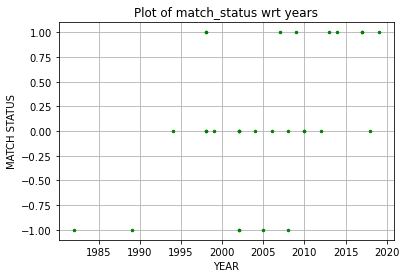

Text(0.5, 1.0, 'Histogram of match_status')

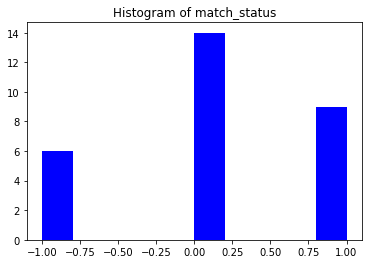

In [7]:
#checking
print(sa2_vs_asia)

#plot sa2_vs_africa
plt.plot(sa2_vs_africa['year'], sa2_vs_africa['match_status'], 'o-', ms = 2.5, color = 'green', linestyle = '')
plt.xlabel('YEAR')
plt.ylabel('MATCH STATUS')
plt.title('Plot of match_status wrt years')
plt.grid(True)
plt.show()

plt.hist(sa2_vs_africa['match_status'], color = 'blue')
plt.title('Histogram of match_status')